# Wilcoxon signed-rank test
 
 https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.wilcoxon.html

The Wilcoxon signed-rank test tests the null hypothesis that two related paired samples come from the same distribution. In particular, it tests whether the distribution of the differences x - y is symmetric about zero. It is a non-parametric version of the paired T-test.

Nonparametric alternative to paired T-test, which is used when the data are not normally distributed.

Mainly used when the data is paired and the distribution is not normal.

Algorithm:
1. remove equal pairs
2. rank-transform the differences $$ r = rank(|x-y|)$$



In [1]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


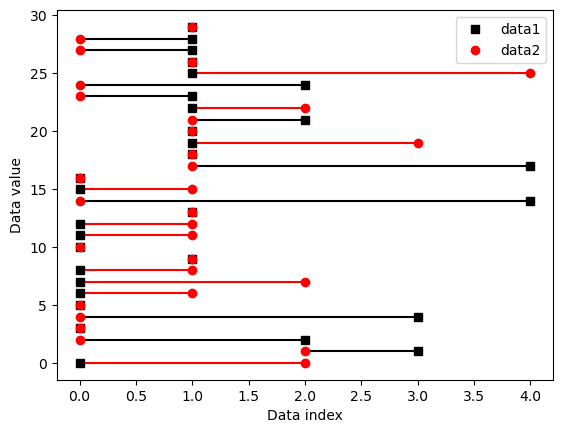

In [4]:
# generate data
N = 30

data1 = np.random.poisson(1.5, N)
data2 = np.random.poisson(1, N)

colors = 'kr'

# plot data
for i in range(N):
    plt.plot([data1[i], data2[i]], [i, i], colors[int(data1[i]<data2[i])])

plt.plot(data1, np.arange(N), 'ks', markerfacecolor='k', label='data1')
plt.plot(data2, np.arange(N), 'ro', markerfacecolor='r', label='data2')

plt.xlabel('Data index')
plt.ylabel('Data value')
plt.legend()

plt.show()

In [5]:
# the test
t,p = stats.wilcoxon(data1,data2)
print("Wilcoxon signed-rank test z=%g, p=%g" % (t,p))

Wilcoxon signed-rank test z=96, p=0.731319


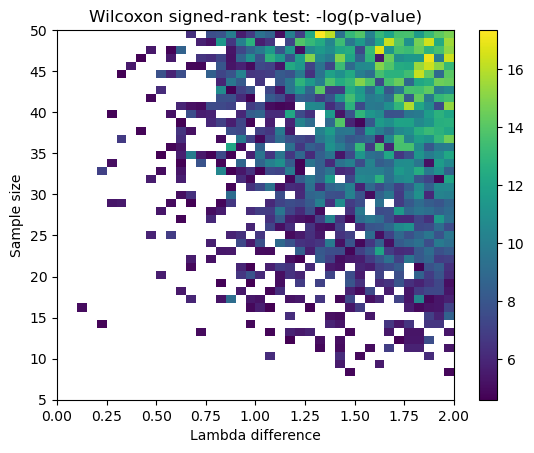

In [7]:
# 2D space
Ns = np.arange(5,51)
lambdas = np.linspace(1,3,40)

# initialize input matrix
pvals = np.zeros((len(Ns),len(lambdas)))

for ni in range(len(Ns)):
    for li in range(len(lambdas)):
        # generate data
        data1 = np.random.poisson(lambdas[0], Ns[ni])
        data2 = np.random.poisson(lambdas[li],Ns[ni])
        # compute p-value
        t,p = stats.wilcoxon(data1,data2)

        pvals[ni,li] = -np.log(p)

# optioanal p-value threshold
pval_thresh = .01
pvals[pvals < -np.log(pval_thresh)] = np.NaN

# show in the heatmap
plt.imshow(pvals, origin='lower', aspect='auto', extent=[lambdas[0]-1,lambdas[-1]-1,Ns[0],Ns[-1]])
plt.xlabel('Lambda difference')
plt.ylabel('Sample size')
plt.title('Wilcoxon signed-rank test: -log(p-value)')
plt.colorbar()
plt.show()